<a href="https://colab.research.google.com/github/duongDSAI64/ThiTHPT/blob/master/SoSanh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
plt.style.use(
    'ggplot')
plt.rcParams['figure.figsize'] = (20, 7)


In [2]:
data2020 = pd.read_csv(r"https://raw.githubusercontent.com/duongDSAI64/ThiTHPT/master/Diemthi2020.csv", encoding = "Latin-1")
data2020

,SBD,Toan,Ngu_van,Ngoai_ngu,Vat_ly,Hoa_hoc,Sinh_hoc,Lich_su,Dia_ly,GDCD,Ma_cum
0,1000001,7.0,6.00,NaN,NaN,NaN,NaN,8.00,NaN,NaN,1
1,1000002,9.0,6.00,9.4,7.25,8.75,7.25,NaN,NaN,NaN,1
2,1000003,8.8,6.50,6.0,8.25,8.75,4.75,NaN,NaN,NaN,1
3,1000004,7.0,NaN,8.2,NaN,6.00,NaN,NaN,NaN,NaN,1
4,1000005,9.0,7.50,9.2,NaN,NaN,NaN,5.75,7.25,9.25,1
...,...,...,...,...,...,...,...,...,...,...,...
811443,64005818,7.8,6.75,5.0,5.25,7.75,8.75,NaN,NaN,NaN,64
811444,64005819,9.2,7.25,7.6,5.50,8.00,7.75,NaN,NaN,NaN,64
811445,64005820,7.0,6.75,2.2,7.25,4.50,4.75,NaN,NaN,NaN,64
811446,64005821,6.8,7.00,3.4,NaN,NaN,NaN,5.75,6.50,7.25,64


In [3]:
data2021 = pd.read_csv(r"https://raw.githubusercontent.com/duongDSAI64/ThiTHPT/master/Diemthi2021.csv", encoding = "Latin-1")
data2021

,SBD,Toan,Ngu_van,Ngoai_ngu,Vat_ly,Hoa_hoc,Sinh_hoc,Lich_su,Dia_ly,GDCD,Cum_thi
0,1000001,2.2,3.50,NaN,NaN,NaN,NaN,2.50,5.50,NaN,1
1,1000002,9.2,8.25,10.0,NaN,NaN,NaN,5.75,9.75,9.25,1
2,1000003,4.4,6.25,NaN,NaN,NaN,NaN,4.25,4.00,NaN,1
3,1000004,8.4,6.75,10.0,4.00,3.00,3.50,NaN,NaN,NaN,1
4,1000005,8.8,8.25,9.4,8.25,5.75,5.25,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
988008,64006834,8.6,8.25,6.2,8.25,7.00,6.50,NaN,NaN,NaN,64
988009,64006835,9.0,7.50,9.4,8.00,8.25,5.50,NaN,NaN,NaN,64
988010,64006836,4.8,7.00,4.6,NaN,NaN,NaN,3.75,7.00,9.00,64
988011,64006837,7.4,7.75,9.4,NaN,NaN,NaN,4.50,6.75,9.25,64


### **Tính điểm theo khối**

In [36]:
def tinhDiem(data):
  data['Ngu_van'] = round((data['Ngu_van']),2)
  data['A'] = data['Toan']+data['Vat_ly']+data['Hoa_hoc']
  data['B'] = data['Toan']+data['Sinh_hoc']+data['Hoa_hoc']
  data['C'] = round((data['Ngu_van']+data['Lich_su']+data['Dia_ly']),2)
  data['A1'] = data['Toan'] + data['Ngoai_ngu'] + data['Vat_ly']
  data['D1'] = round((data['Toan'] + data['Ngu_van'] + data['Ngoai_ngu']),2)
  data['A-BK'] = round((2*data['Toan']+data['Vat_ly']+data['Hoa_hoc'])*0.75,2)
  data['A1-BK'] = round((2*data['Toan'] + data['Ngoai_ngu'] + data['Vat_ly'])*0.75,2) 

tinhDiem(data2020)
tinhDiem(data2021)

### **So sánh**

In [37]:
def phodiem(data1, data2, mon_hoc, title):
  data_show1 = []
  data_show2 = []
  if (len(mon_hoc)<3 or ('-' in mon_hoc)):
    bins = [i/2 for i in range(0,61)]
    data_show1 = data1[mon_hoc].value_counts(normalize = True, bins = bins).sort_index()
    data_show2 = data2[mon_hoc].value_counts(normalize = True, bins = bins).sort_index()
  elif (mon_hoc == 'Ngu_van'):
    bins = [i/4 for i in range(0,41)]
    data_show1 = data1[mon_hoc].value_counts(normalize = True, bins = bins).sort_index()
    data_show2 = data2[mon_hoc].value_counts(normalize = True, bins = bins).sort_index()
  else:
    data_show1 = data1[mon_hoc].value_counts(normalize = True).sort_index()
    data_show2 = data2[mon_hoc].value_counts(normalize = True).sort_index()

  font = {'family': 'serif',
          'color':  'black',
          'weight': 'normal',
          'size': 12,
          }
  font_title = {'family': 'serif',
          'color':  'black',
          'weight': 'normal',
          'size': 16,
          }
  
  plt.grid(c='white', linewidth=2, fillstyle='full', b=True)
  plt.ylim(0, data_show1.values.max()*1.4)
  plt.xlabel('Điểm', labelpad = 10)
  plt.ylabel('Tỉ lệ', labelpad = 15)
  plt.title(title)

  pho2020 = data_show1.plot(label = '2020')
  pho2021 = data_show2.plot(label = '2021')
  plt.legend(shadow = True, borderpad = 1, title = 'Chú thích')
  plt.show()

In [38]:
ma_Monhoc = [
    {'Mon_hoc':'Toan', 'Ten': 'Toán'},
    {'Mon_hoc':'Ngu_van', 'Ten': 'Ngữ Văn'},
    {'Mon_hoc':'Ngoai_ngu', 'Ten': 'Tiếng Anh'},
    {'Mon_hoc':'Hoa_hoc', 'Ten': 'Hóa học'},
    {'Mon_hoc':'Sinh_hoc', 'Ten': 'Sinh hoc'},
    {'Mon_hoc':'Vat_ly', 'Ten': 'Vật lý'},
    {'Mon_hoc':'Lich_su', 'Ten': 'Lịch sử'},
    {'Mon_hoc':'Dia_ly', 'Ten': 'Địa lý'},
    {'Mon_hoc':'GDCD', 'Ten': 'Giáo dục công dân'},
    {'Mon_hoc':'A', 'Ten': 'Khối A'},
    {'Mon_hoc':'B', 'Ten': 'Khối B'},
    {'Mon_hoc':'C', 'Ten': 'Khối C'},
    {'Mon_hoc':'D1', 'Ten': 'Khối D1'},
    {'Mon_hoc':'A1', 'Ten': 'Khối A1'},
    {'Mon_hoc':'A-BK', 'Ten': 'Khối A theo BK'},
    {'Mon_hoc':'A1-BK', 'Ten': 'Khối A1 theo BK'}
]

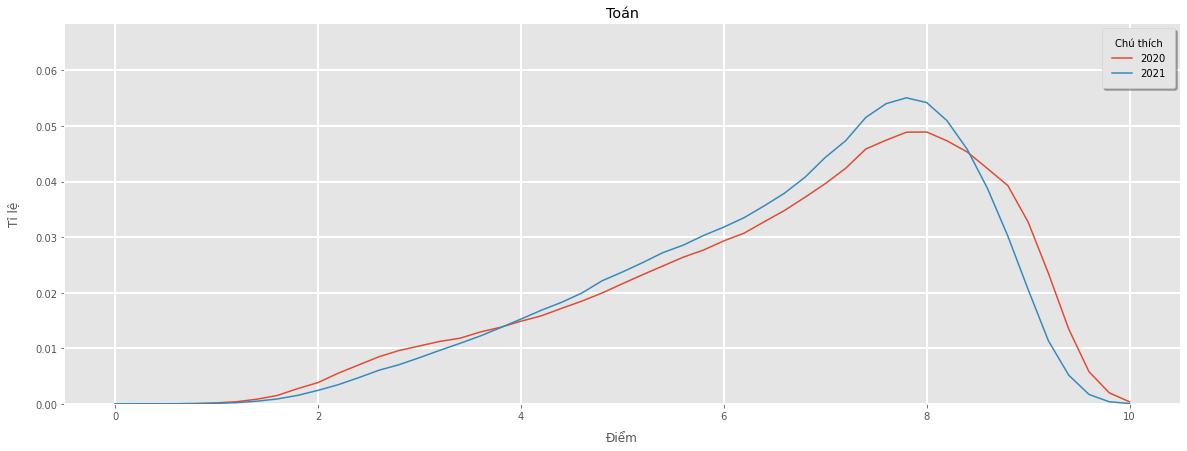

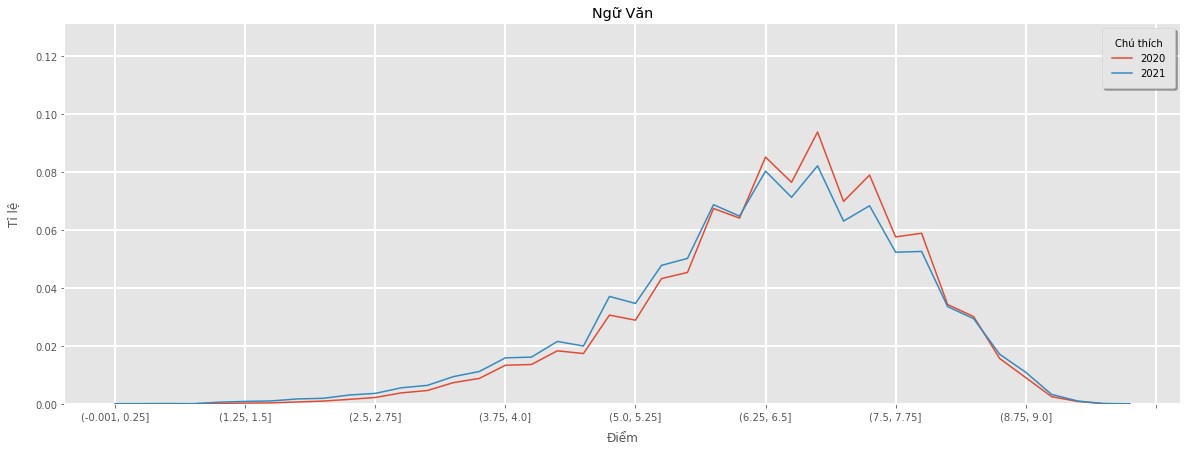

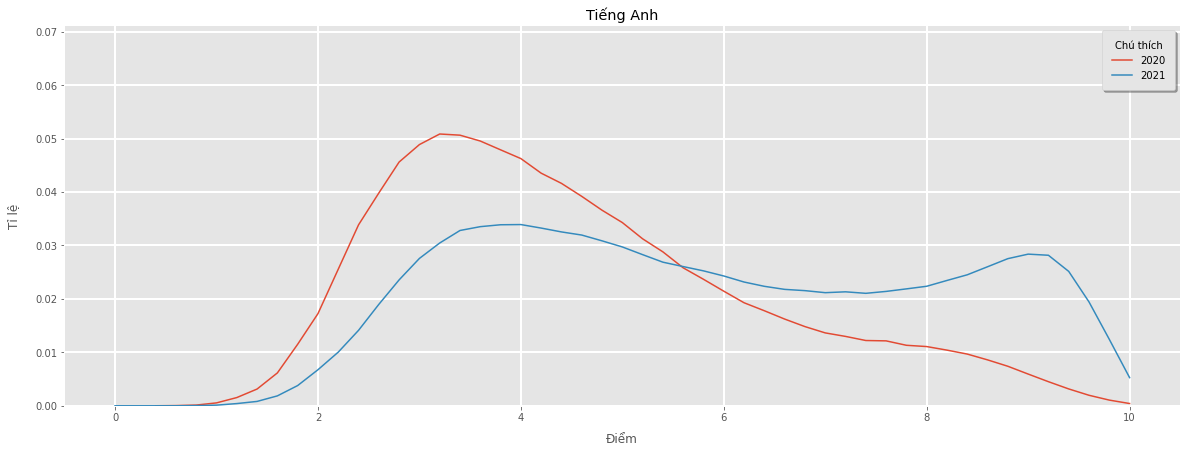

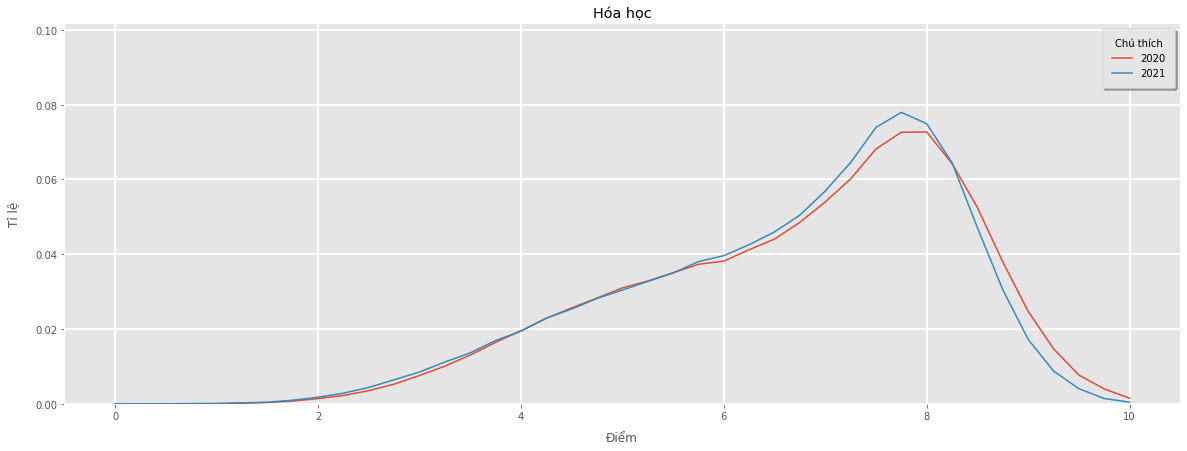

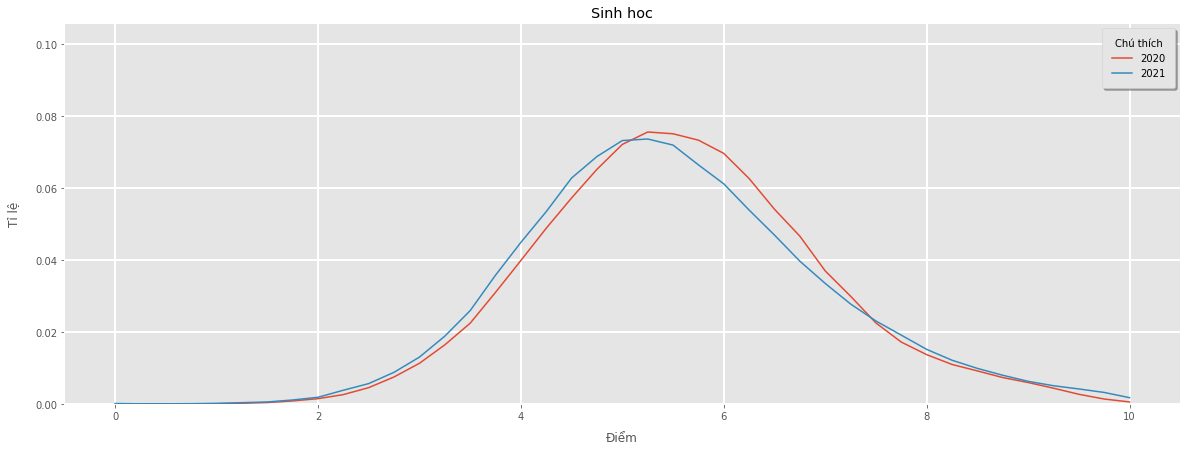

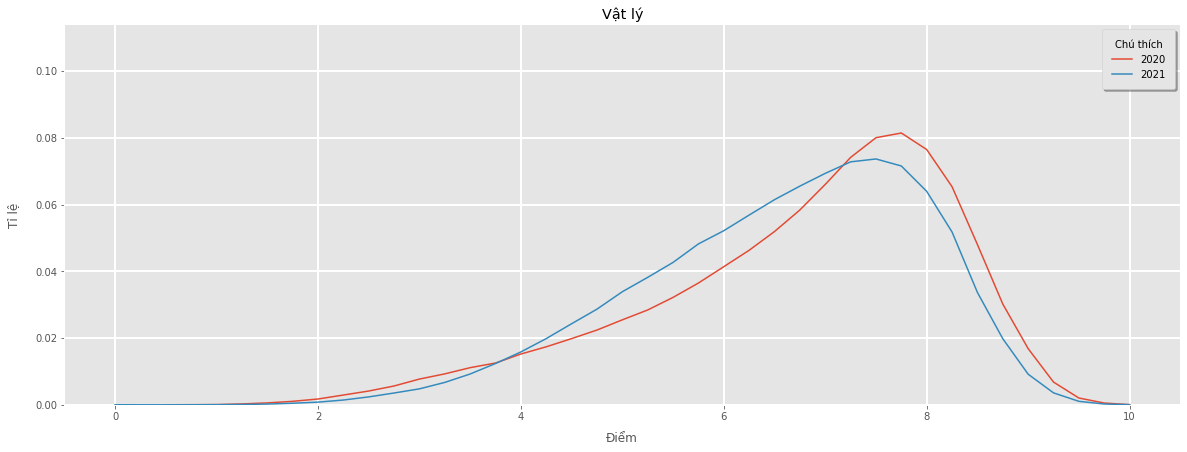

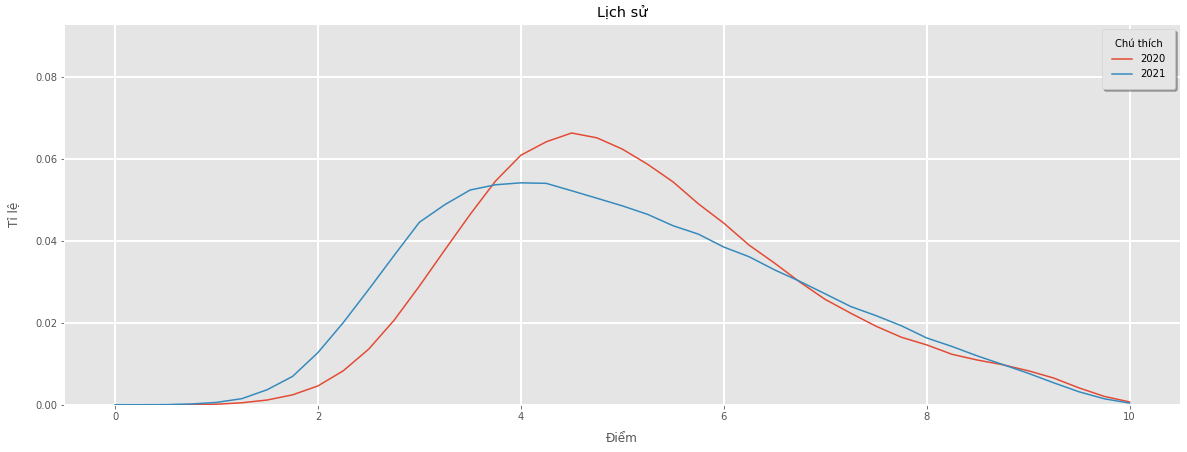

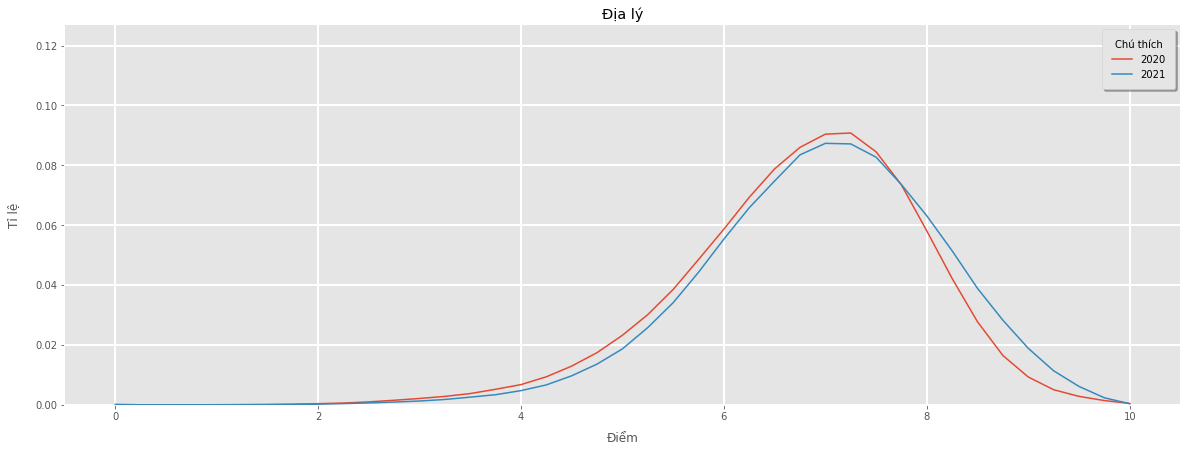

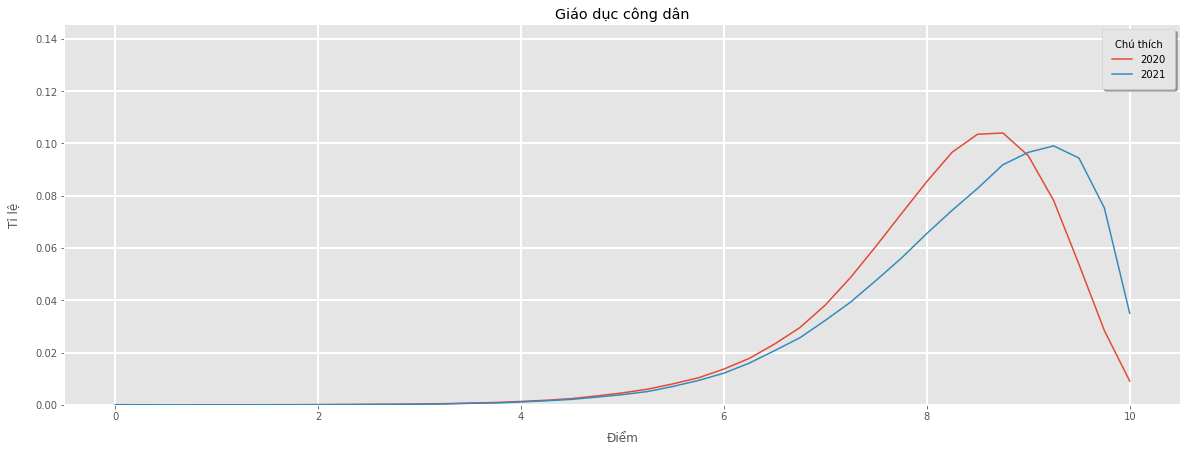

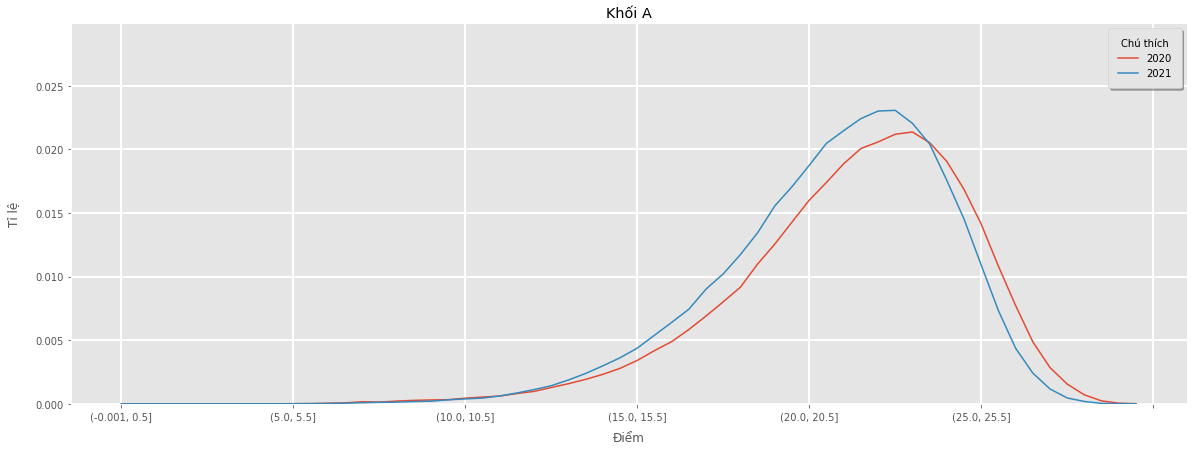

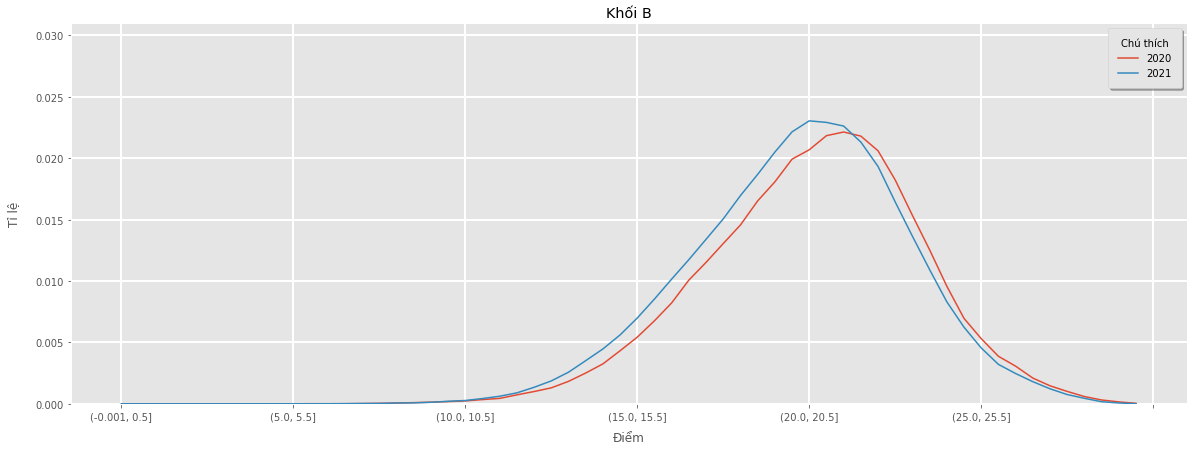

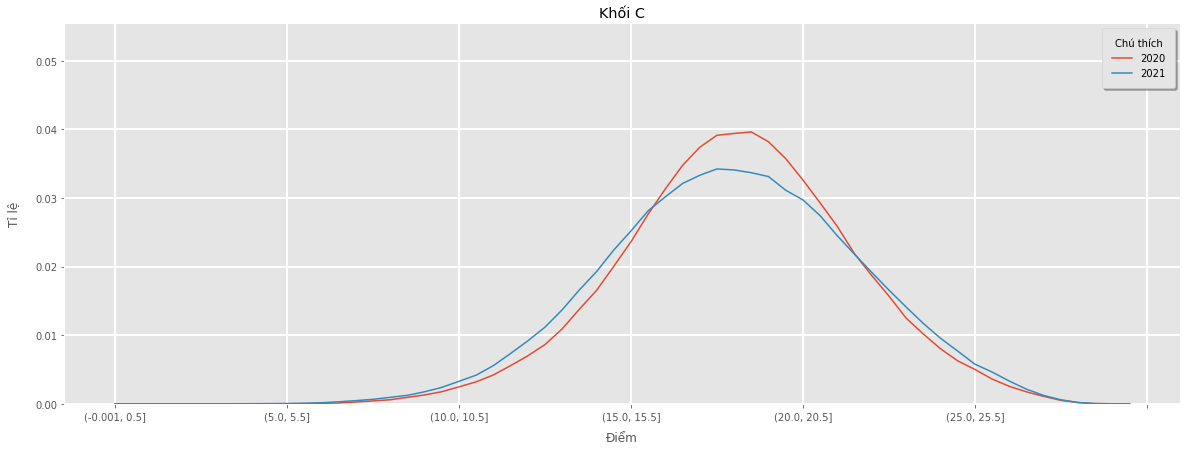

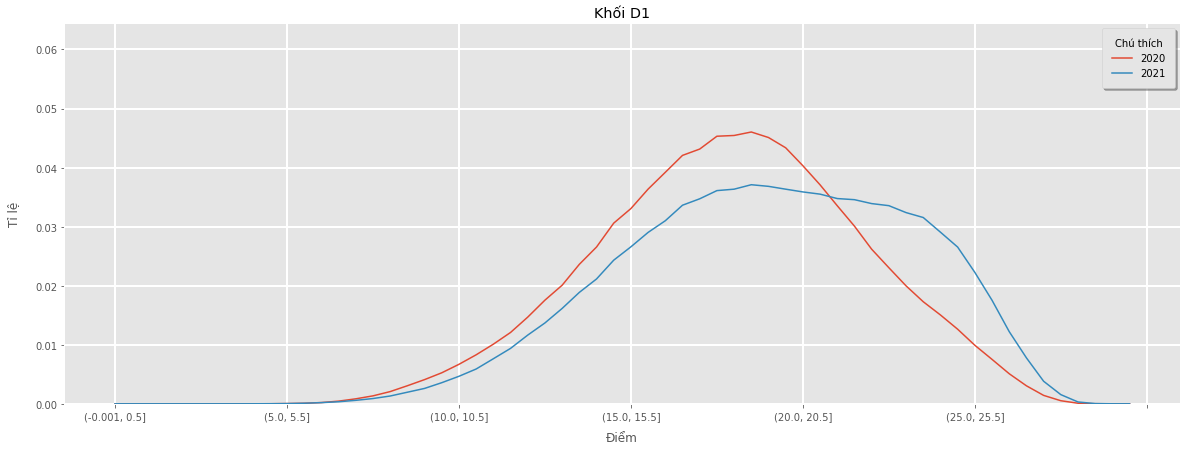

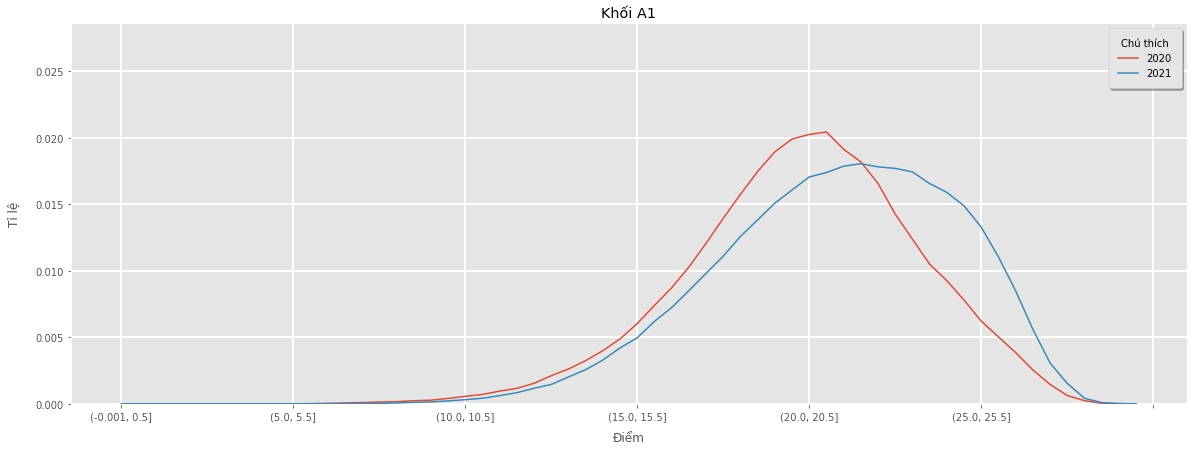

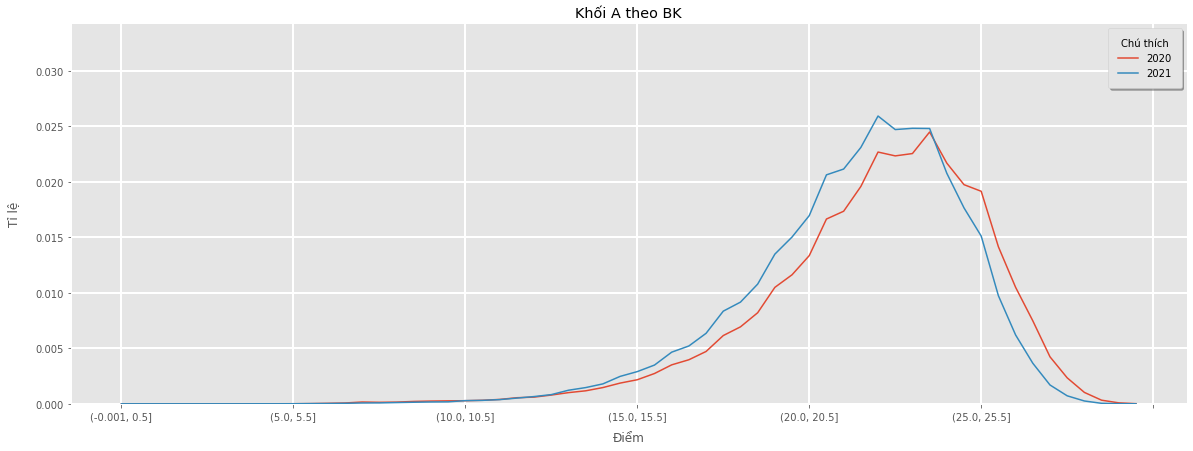

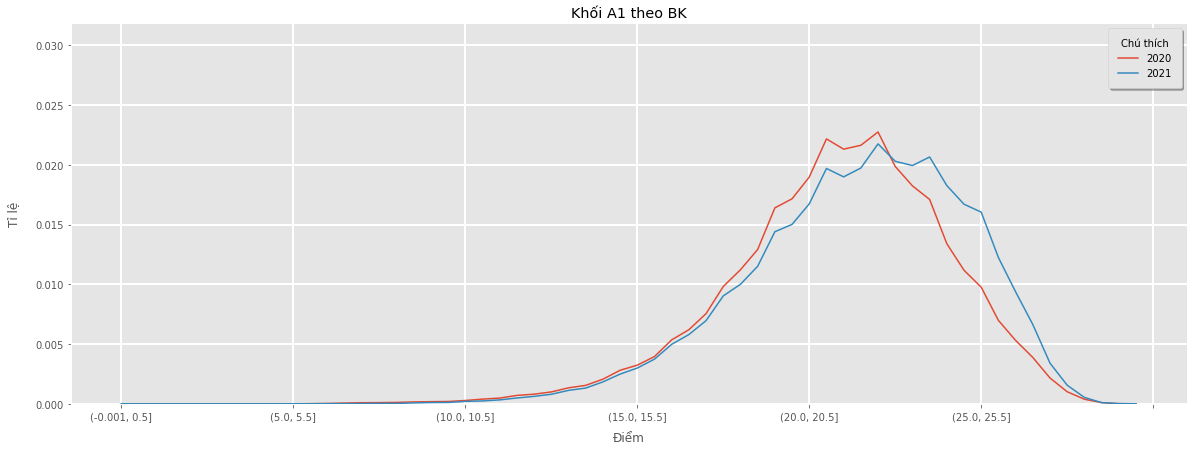

In [39]:
for node in ma_Monhoc:
  phodiem(data2020, data2021,node['Mon_hoc'], node['Ten'])

### **Tra cứu xếp hạng**

In [160]:
def XepHang(mon, diem, nam):
  if nam == 2020:
    data = data2020[mon].value_counts().sort_index(ascending = False)
  else:
    data = data2021[mon].value_counts().sort_index(ascending = False)
  if diem not in data.index:
    print('Please enter correct exam result')
  else:
    rank = 1
    i = 0
    while diem < (data.index)[i]:
      rank += (data.values)[i]
      i+=1
    print('Điểm:',diem, '_ Hạng:',rank, '_ Số người bằng điểm:',(data.values)[i]-1)

### **Tính trung bình và độ lệch chuẩn**

In [82]:
import statistics as sta

def TB(mon,nam):
  data = []
  if nam == 2020:
    for i in data2020[mon]:
      if i>=0:
        data.append(i)
  else:
    for i in data2021[mon]:
      if i>=0:
        data.append(i)
  mean = sta.mean(data)
  stdev = sta.stdev(data)
  return [mean, stdev]

### **Quy đổi điểm tương đương so với năm trước**

In [221]:
from scipy.stats import norm

def QuyDoi(mon,diem):
  D2020 = []
  for i in data2020[mon]:
    if i>=0:
      D2020.append(i)

  D2021 = []
  for i in data2021[mon]:
    if i>=0:
      D2021.append(i)

  TB2020 = TB(mon,2020)
  TB2021 = TB(mon,2021)
  P = norm.cdf(diem,TB2021[0],TB2021[1])
  Diem2020 = round(norm.isf(1-P,TB2020[0],TB2020[1])-0.3,2)
  print('Điểm tương đương năm 2020:',Diem2020)


In [243]:
def full(mon,diem):
  XepHang(mon, diem, 2021)
  QuyDoi(mon,diem)

full('A1-BK',26.4)

Điểm: 26.4 _ Hạng: 13355 _ Số người bằng điểm: 618
Điểm tương đương năm 2020: 25.45
